In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
alpha=pd.read_csv('Alphabets_data.csv')

In [3]:
alpha.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
alpha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
alpha.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
alpha.isna().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [7]:
alpha.shape

(20000, 17)

In [8]:
# checking duplicate values
alpha[alpha.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


- it seems there is lot of duplicate values so we need to remove that values. coz presence of duplicate values leads  to bias and overfitting issues

In [9]:
alpha.drop_duplicates(inplace=True)

In [10]:
alpha.shape  # we successfully removed duplicate values

(18668, 17)

In [11]:
# Label encoding to output variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
alpha['letter'] = encoder.fit_transform(alpha['letter'])
alpha['letter']

,letter
0,19
1,8
2,3
3,13
4,6
...,...
19994,19
19995,3
19996,2
19997,19


In [12]:
alpha[alpha.isnull().any(axis=1)]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [13]:
alpha

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [14]:
# lets check correlation
alpha.corr()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,1.000000,0.105646,-0.000023,0.093698,0.041871,0.000835,-0.055585,0.311597,-0.113980,0.000437,-0.081157,0.387574,-0.141832,0.096098,0.336402,-0.068714,-0.184479
xbox,0.105646,1.000000,0.753845,0.838201,0.656202,0.586514,-0.039371,0.035260,0.010554,0.035618,0.135848,0.033564,-0.045004,0.473408,0.094814,0.246954,-0.097928
ybox,-0.000023,0.753845,1.000000,0.660359,0.804746,0.529108,0.044918,-0.055264,-0.017451,0.077625,0.150073,-0.058348,-0.004483,0.262301,-0.007424,0.214834,-0.031288
width,0.093698,0.838201,0.660359,1.000000,0.647059,0.747093,0.057657,0.007720,-0.108948,0.036848,0.088383,0.004005,-0.044465,0.548471,0.037140,0.225726,-0.111611
height,0.041871,0.656202,0.804746,0.647059,1.000000,0.631189,0.043576,-0.028748,0.094866,0.030820,-0.005738,-0.009940,0.030940,0.250480,0.023574,0.289518,-0.006940
onpix,0.000835,0.586514,0.529108,0.747093,0.631189,1.000000,0.138054,-0.046437,-0.006882,-0.095682,-0.111016,-0.079454,-0.037892,0.627043,0.011670,0.483866,-0.053799
xbar,-0.055585,-0.039371,0.044918,0.057657,0.043576,0.138054,1.000000,-0.394904,-0.053963,-0.127433,0.056401,-0.379856,-0.043720,0.139327,-0.259587,0.126966,0.258355
ybar,0.311597,0.035260,-0.055264,0.007720,-0.028748,-0.046437,-0.394904,1.000000,-0.111068,-0.049806,0.155055,0.596464,-0.284431,-0.049289,0.561759,-0.096509,-0.211369
x2bar,-0.113980,0.010554,-0.017451,-0.108948,0.094866,-0.006882,-0.053963,-0.111068,1.000000,-0.163920,-0.309157,0.041791,0.087403,0.113528,-0.078674,0.033467,0.185946
y2bar,0.000437,0.035618,0.077625,0.036848,0.030820,-0.095682,-0.127433,-0.049806,-0.163920,1.000000,0.123406,-0.049807,0.118624,-0.386254,-0.058009,0.240212,-0.061613


<Axes: >

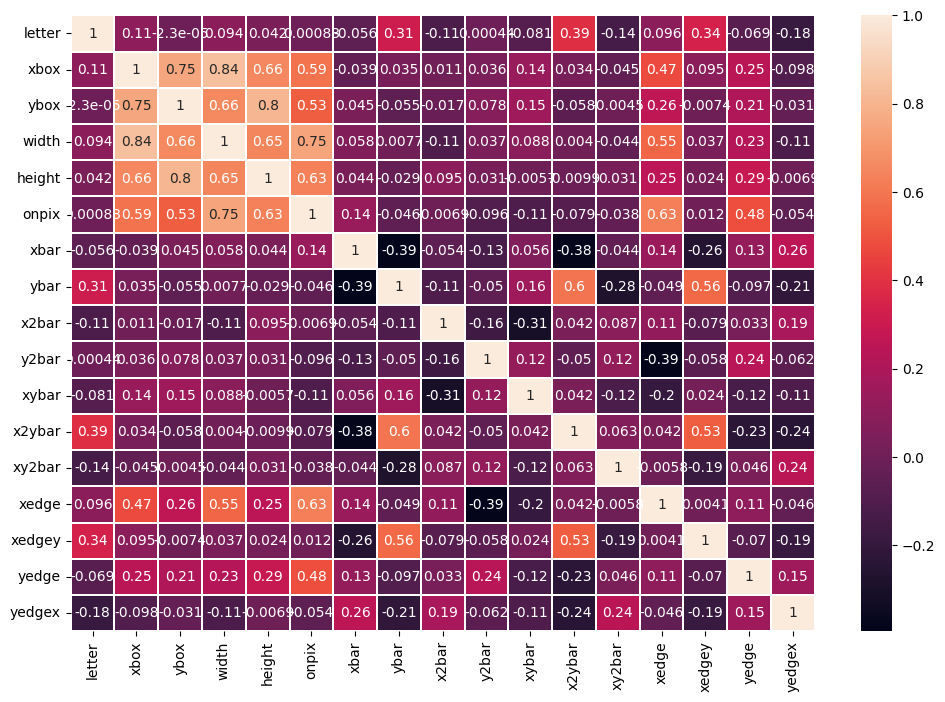

In [15]:
# lets plot Heatmap to visualise correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(alpha.corr(),annot=True,linewidths=0.2)

In [16]:
# xbox and width have correlation =0.84
# ybox and height have correlation =0.8
# xbox and ybox have correlation =0.75
# width and onpix have correlation =0.75

In [17]:
# before removing any feature from dataset will check is there any multicollinearity in the dataset for that will calculate VIF

In [18]:
# check VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [20]:
# Add constant to DataFrame
A = add_constant(alpha[['xbox', 'ybox', 'width', 'onpix','height']])
A.isnull().sum()

,0
const,0
xbox,0
ybox,0
width,0
onpix,0
height,0


In [21]:
# Calculate VIF
vif = pd.DataFrame()
vif['Variable'] = A.columns
vif['VIF'] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

print(vif)

  Variable        VIF
0    const  10.554646
1     xbox   4.547474
2     ybox   3.866496
3    width   5.056066
4    onpix   2.604076
5   height   3.405478


In [22]:
# vif of width is high so we removed width

In [23]:
alpha.drop('width',axis=True,inplace=True)

In [24]:
alpha.head()

,letter,xbox,ybox,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,1,1,8,6,6,6,6,5,9,1,7,5,10


In [25]:
alpha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18668 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   letter  18668 non-null  int64
 1   xbox    18668 non-null  int64
 2   ybox    18668 non-null  int64
 3   height  18668 non-null  int64
 4   onpix   18668 non-null  int64
 5   xbar    18668 non-null  int64
 6   ybar    18668 non-null  int64
 7   x2bar   18668 non-null  int64
 8   y2bar   18668 non-null  int64
 9   xybar   18668 non-null  int64
 10  x2ybar  18668 non-null  int64
 11  xy2bar  18668 non-null  int64
 12  xedge   18668 non-null  int64
 13  xedgey  18668 non-null  int64
 14  yedge   18668 non-null  int64
 15  yedgex  18668 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [26]:
alpha[alpha.isnull().any(axis=1)]

,letter,xbox,ybox,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [27]:
alpha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18668 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   letter  18668 non-null  int64
 1   xbox    18668 non-null  int64
 2   ybox    18668 non-null  int64
 3   height  18668 non-null  int64
 4   onpix   18668 non-null  int64
 5   xbar    18668 non-null  int64
 6   ybar    18668 non-null  int64
 7   x2bar   18668 non-null  int64
 8   y2bar   18668 non-null  int64
 9   xybar   18668 non-null  int64
 10  x2ybar  18668 non-null  int64
 11  xy2bar  18668 non-null  int64
 12  xedge   18668 non-null  int64
 13  xedgey  18668 non-null  int64
 14  yedge   18668 non-null  int64
 15  yedgex  18668 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [28]:
X=alpha.drop('letter',axis=1)
y=alpha.iloc[:,0].squeeze()
y

,letter
0,19
1,8
2,3
3,13
4,6
...,...
19994,19
19995,3
19996,2
19997,19


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [32]:
X_train=scaler.fit_transform(X_train)

In [33]:
X_test=scaler.transform(X_test)

In [34]:
X_test

array([[-0.61088635, -1.00975531, -1.14130343, ...,  1.68286245,
        -1.49332608,  0.13436456],
       [ 2.58008138,  2.11472635,  1.14252686, ..., -0.85430052,
         2.04070894,  0.73858027],
       [-0.61088635, -1.00975531, -1.14130343, ...,  1.68286245,
        -1.10065552, -1.67828257],
       ...,
       [ 0.45276956,  0.55248552,  1.14252686, ...,  1.04857171,
         2.04070894, -1.67828257],
       [ 0.45276956,  0.55248552,  0.22899474, ..., -0.85430052,
        -0.3153144 , -1.07406686],
       [ 0.45276956,  0.55248552,  0.22899474, ..., -0.22000978,
         0.07735615,  0.73858027]])

In [35]:
y_train

,letter
1665,6
4791,23
10602,14
4932,4
5819,16
...,...
11856,9
12596,6
5555,22
863,24


In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
model=keras.Sequential(
    [keras.layers.Dense(15,activation='relu'),
     keras.layers.Dense(15,activation='relu'),
     keras.layers.Dense(26,activation='softmax')]
)

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1101 - loss: 3.0924 - val_accuracy: 0.4118 - val_loss: 2.0535
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4971 - loss: 1.7756 - val_accuracy: 0.5976 - val_loss: 1.3736
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6243 - loss: 1.2835 - val_accuracy: 0.6475 - val_loss: 1.1815
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6615 - loss: 1.1317 - val_accuracy: 0.6746 - val_loss: 1.0778
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6896 - loss: 1.0363 - val_accuracy: 0.6917 - val_loss: 1.0070
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7149 - loss: 0.9533 - val_accuracy: 0.7111 - val_loss: 0.9551
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7300 - loss: 0.9064 - val_accuracy: 0.7154 - val_loss: 0.9222
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7445 - loss: 0.8491 - val_accu

In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8256 - loss: 0.5987
Test Accuracy: 82.75%


In [41]:
import matplotlib.pyplot as plt

In [42]:
history.history

{'accuracy': [0.20214278995990753,
  0.5432326197624207,
  0.6393236517906189,
  0.675399661064148,
  0.700510561466217,
  0.7180882096290588,
  0.7294718623161316,
  0.7404369115829468,
  0.7538294196128845,
  0.7581819891929626,
  0.7615301012992859,
  0.7679752111434937,
  0.7698166966438293,
  0.7769314646720886,
  0.7806143760681152,
  0.7829580903053284,
  0.7863898873329163,
  0.7894032001495361,
  0.7931698560714722,
  0.7954298257827759,
  0.7972713112831116,
  0.799782395362854,
  0.7984431385993958,
  0.8018749356269836,
  0.803381621837616,
  0.8056415915489197,
  0.8057252764701843,
  0.8089060187339783,
  0.8099104166030884,
  0.8097430467605591,
  0.811165988445282,
  0.8142629861831665,
  0.8152674436569214,
  0.8176110982894897,
  0.8192851543426514,
  0.8202896118164062,
  0.820540726184845,
  0.8212940692901611,
  0.8211266398429871,
  0.8241399526596069,
  0.8258140087127686,
  0.8265673518180847,
  0.8269021511077881,
  0.8286598920822144,
  0.8274880647659302,
  0

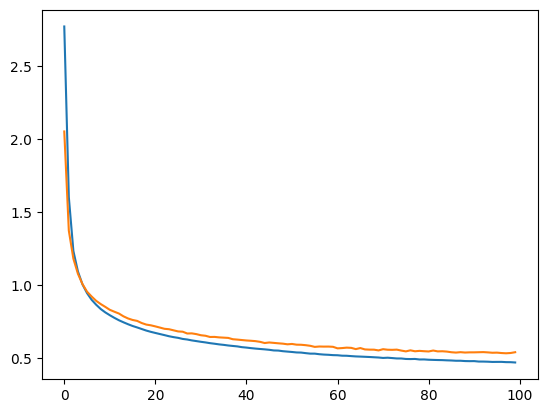

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


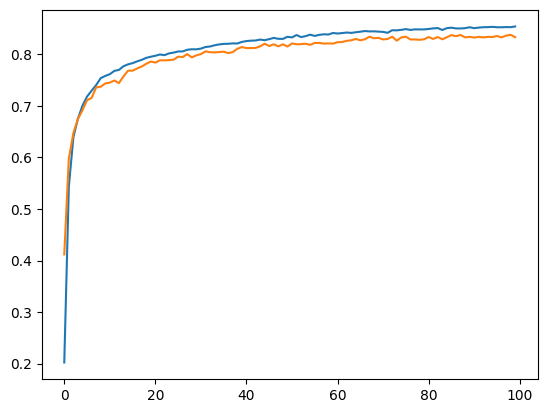

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# early stopping

In [46]:

early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [47]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop])

Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8622 - loss: 0.4547 - val_accuracy: 0.8339 - val_loss: 0.5382
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8524 - loss: 0.4697 - val_accuracy: 0.8376 - val_loss: 0.5302
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8590 - loss: 0.4552 - val_accuracy: 0.8376 - val_loss: 0.5396
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8530 - loss: 0.4686 - val_accuracy: 0.8373 - val_loss: 0.5320
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8567 - loss: 0.4624 - val_accuracy: 0.8366 - val_loss: 0.5307
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.4644 - val_accuracy: 0.8366 - val_loss: 0.5302
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.4651 - val_accuracy: 0.8400 - val_loss: 0.5285
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.4651 - val_accu

In [48]:
history.history

{'accuracy': [0.8561981916427612,
  0.854858934879303,
  0.8535197377204895,
  0.8554449081420898,
  0.8557797074317932,
  0.8553611636161804,
  0.8559470772743225,
  0.8556959629058838,
  0.8587092757225037,
  0.8564493060112,
  0.8561145067214966,
  0.8565330505371094,
  0.8577885627746582,
  0.8558633923530579,
  0.8556122779846191,
  0.8587092757225037,
  0.8567841053009033,
  0.8600485324859619,
  0.8583744764328003,
  0.8589603900909424],
 'loss': [0.4683864116668701,
  0.4685591459274292,
  0.46703556180000305,
  0.4661328196525574,
  0.46570828557014465,
  0.46695953607559204,
  0.46284574270248413,
  0.46306338906288147,
  0.4624387323856354,
  0.4616726040840149,
  0.46131134033203125,
  0.4600585103034973,
  0.45837870240211487,
  0.45792174339294434,
  0.4580707848072052,
  0.4564434885978699,
  0.45621439814567566,
  0.4559398293495178,
  0.45526301860809326,
  0.4528787434101105],
 'val_accuracy': [0.8339471220970154,
  0.8376297354698181,
  0.8376297354698181,
  0.837294

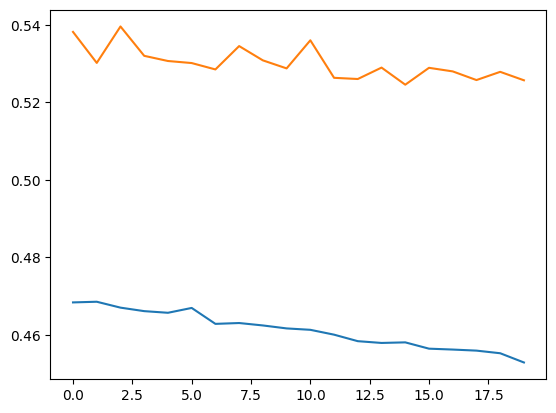

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


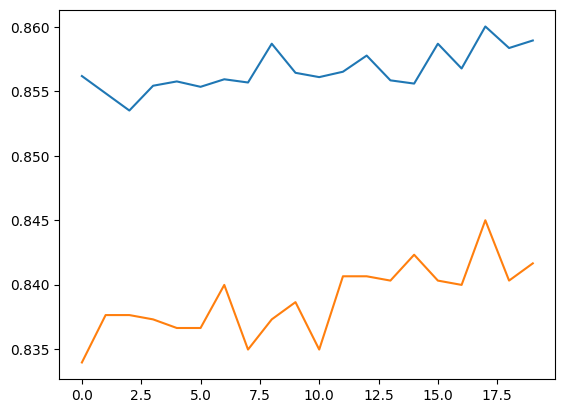

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])